## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  73.988230   763.816135  0.616591  3.627437  1.581604
1  91.067502   424.834801  0.783609  1.642471  1.247976
2  50.029346  1555.241364  0.193949  3.810801  1.633681
3  63.323148  1205.228956  0.491956  4.045020  1.422303
4  74.238800   342.985917  0.642791  5.077765  1.362169


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.94762 | train_mse: 3.65132 | train_mae: 1.49074 |  0:00:00s
epoch 1  | loss: 1.02608 | train_mse: 2.94481 | train_mae: 1.32528 |  0:00:00s
epoch 2  | loss: 0.80028 | train_mse: 2.72843 | train_mae: 1.29923 |  0:00:00s


epoch 3  | loss: 0.75043 | train_mse: 2.54358 | train_mae: 1.25613 |  0:00:00s
epoch 4  | loss: 0.85189 | train_mse: 2.0649  | train_mae: 1.15648 |  0:00:00s
epoch 5  | loss: 0.64059 | train_mse: 1.78597 | train_mae: 1.07306 |  0:00:00s


epoch 6  | loss: 0.68116 | train_mse: 1.61279 | train_mae: 1.03294 |  0:00:00s
epoch 7  | loss: 0.67222 | train_mse: 1.41874 | train_mae: 0.97604 |  0:00:00s


epoch 8  | loss: 0.54844 | train_mse: 1.29186 | train_mae: 0.94602 |  0:00:01s
epoch 9  | loss: 0.53002 | train_mse: 1.13109 | train_mae: 0.88194 |  0:00:01s
epoch 10 | loss: 0.62396 | train_mse: 1.01521 | train_mae: 0.83475 |  0:00:01s


epoch 11 | loss: 0.57983 | train_mse: 0.93734 | train_mae: 0.79709 |  0:00:01s
epoch 12 | loss: 0.61308 | train_mse: 0.87493 | train_mae: 0.76211 |  0:00:01s
epoch 13 | loss: 0.52517 | train_mse: 0.82381 | train_mae: 0.73679 |  0:00:01s


epoch 14 | loss: 0.51986 | train_mse: 0.78742 | train_mae: 0.71622 |  0:00:01s
epoch 15 | loss: 0.41752 | train_mse: 0.75607 | train_mae: 0.69716 |  0:00:01s
epoch 16 | loss: 0.50587 | train_mse: 0.71591 | train_mae: 0.67945 |  0:00:01s


epoch 17 | loss: 0.455   | train_mse: 0.65713 | train_mae: 0.65315 |  0:00:01s
epoch 18 | loss: 0.53065 | train_mse: 0.6367  | train_mae: 0.63637 |  0:00:02s


epoch 19 | loss: 0.45131 | train_mse: 0.62674 | train_mae: 0.6234  |  0:00:02s
epoch 20 | loss: 0.49134 | train_mse: 0.614   | train_mae: 0.61352 |  0:00:02s
epoch 21 | loss: 0.59446 | train_mse: 0.59869 | train_mae: 0.6052  |  0:00:02s


epoch 22 | loss: 0.45942 | train_mse: 0.57913 | train_mae: 0.59067 |  0:00:02s
epoch 23 | loss: 0.51245 | train_mse: 0.56024 | train_mae: 0.58295 |  0:00:02s
epoch 24 | loss: 0.3678  | train_mse: 0.53349 | train_mae: 0.56382 |  0:00:02s


epoch 25 | loss: 0.51138 | train_mse: 0.52062 | train_mae: 0.55875 |  0:00:02s
epoch 26 | loss: 0.57341 | train_mse: 0.50277 | train_mae: 0.54804 |  0:00:02s
epoch 27 | loss: 0.53914 | train_mse: 0.4892  | train_mae: 0.53751 |  0:00:02s


epoch 28 | loss: 0.35449 | train_mse: 0.47692 | train_mae: 0.52757 |  0:00:03s
epoch 29 | loss: 0.39226 | train_mse: 0.46129 | train_mae: 0.51506 |  0:00:03s


epoch 30 | loss: 0.38626 | train_mse: 0.44308 | train_mae: 0.5078  |  0:00:03s
epoch 31 | loss: 0.4806  | train_mse: 0.4211  | train_mae: 0.49522 |  0:00:03s
epoch 32 | loss: 0.46599 | train_mse: 0.39779 | train_mae: 0.47713 |  0:00:03s


epoch 33 | loss: 0.38175 | train_mse: 0.38921 | train_mae: 0.47431 |  0:00:03s
epoch 34 | loss: 0.34958 | train_mse: 0.37911 | train_mae: 0.46723 |  0:00:03s
epoch 35 | loss: 0.44679 | train_mse: 0.36204 | train_mae: 0.45302 |  0:00:03s


epoch 36 | loss: 0.45663 | train_mse: 0.35553 | train_mae: 0.44569 |  0:00:03s
epoch 37 | loss: 0.3948  | train_mse: 0.3429  | train_mae: 0.43785 |  0:00:03s


epoch 38 | loss: 0.32774 | train_mse: 0.34303 | train_mae: 0.43625 |  0:00:03s
epoch 39 | loss: 0.33188 | train_mse: 0.31727 | train_mae: 0.42838 |  0:00:04s


epoch 40 | loss: 0.3684  | train_mse: 0.31572 | train_mae: 0.42467 |  0:00:04s
epoch 41 | loss: 0.25703 | train_mse: 0.30272 | train_mae: 0.42006 |  0:00:04s
epoch 42 | loss: 0.34199 | train_mse: 0.2952  | train_mae: 0.41682 |  0:00:04s


epoch 43 | loss: 0.34228 | train_mse: 0.2964  | train_mae: 0.41668 |  0:00:04s
epoch 44 | loss: 0.3944  | train_mse: 0.2928  | train_mae: 0.41235 |  0:00:04s
epoch 45 | loss: 0.35513 | train_mse: 0.2827  | train_mae: 0.40668 |  0:00:04s


epoch 46 | loss: 0.3857  | train_mse: 0.27271 | train_mae: 0.39811 |  0:00:04s
epoch 47 | loss: 0.41782 | train_mse: 0.2645  | train_mae: 0.39143 |  0:00:04s
epoch 48 | loss: 0.43583 | train_mse: 0.26094 | train_mae: 0.38615 |  0:00:04s


epoch 49 | loss: 0.30629 | train_mse: 0.2548  | train_mae: 0.38047 |  0:00:05s
epoch 50 | loss: 0.31565 | train_mse: 0.2496  | train_mae: 0.37698 |  0:00:05s
epoch 51 | loss: 0.3784  | train_mse: 0.24587 | train_mae: 0.3743  |  0:00:05s


epoch 52 | loss: 0.36968 | train_mse: 0.24299 | train_mae: 0.37157 |  0:00:05s
epoch 53 | loss: 0.29506 | train_mse: 0.23675 | train_mae: 0.36702 |  0:00:05s
epoch 54 | loss: 0.2197  | train_mse: 0.23975 | train_mae: 0.36711 |  0:00:05s


epoch 55 | loss: 0.28062 | train_mse: 0.23908 | train_mae: 0.36805 |  0:00:05s
epoch 56 | loss: 0.34166 | train_mse: 0.23238 | train_mae: 0.36451 |  0:00:05s
epoch 57 | loss: 0.37902 | train_mse: 0.23116 | train_mae: 0.36813 |  0:00:05s


epoch 58 | loss: 0.43707 | train_mse: 0.22726 | train_mae: 0.36688 |  0:00:05s
epoch 59 | loss: 0.30225 | train_mse: 0.22096 | train_mae: 0.36458 |  0:00:06s
epoch 60 | loss: 0.24715 | train_mse: 0.21259 | train_mae: 0.35553 |  0:00:06s


epoch 61 | loss: 0.24159 | train_mse: 0.20707 | train_mae: 0.35359 |  0:00:06s
epoch 62 | loss: 0.31642 | train_mse: 0.20518 | train_mae: 0.35374 |  0:00:06s
epoch 63 | loss: 0.42342 | train_mse: 0.20877 | train_mae: 0.35391 |  0:00:06s


epoch 64 | loss: 0.30736 | train_mse: 0.20967 | train_mae: 0.35144 |  0:00:06s
epoch 65 | loss: 0.35746 | train_mse: 0.20055 | train_mae: 0.34598 |  0:00:06s
epoch 66 | loss: 0.30718 | train_mse: 0.19731 | train_mae: 0.34219 |  0:00:06s


epoch 67 | loss: 0.36471 | train_mse: 0.1966  | train_mae: 0.34178 |  0:00:06s
epoch 68 | loss: 0.24351 | train_mse: 0.19537 | train_mae: 0.34175 |  0:00:06s
epoch 69 | loss: 0.24808 | train_mse: 0.19669 | train_mae: 0.34289 |  0:00:06s


epoch 70 | loss: 0.21723 | train_mse: 0.19525 | train_mae: 0.34292 |  0:00:07s
epoch 71 | loss: 0.22686 | train_mse: 0.1963  | train_mae: 0.34179 |  0:00:07s


epoch 72 | loss: 0.41154 | train_mse: 0.20387 | train_mae: 0.3409  |  0:00:07s
epoch 73 | loss: 0.36368 | train_mse: 0.20018 | train_mae: 0.33574 |  0:00:07s
epoch 74 | loss: 0.23459 | train_mse: 0.1968  | train_mae: 0.33052 |  0:00:07s


epoch 75 | loss: 0.34662 | train_mse: 0.18907 | train_mae: 0.32565 |  0:00:07s
epoch 76 | loss: 0.31079 | train_mse: 0.186   | train_mae: 0.32469 |  0:00:07s


epoch 77 | loss: 0.18207 | train_mse: 0.18279 | train_mae: 0.32221 |  0:00:07s
epoch 78 | loss: 0.30798 | train_mse: 0.18308 | train_mae: 0.32328 |  0:00:07s


epoch 79 | loss: 0.26383 | train_mse: 0.18282 | train_mae: 0.32564 |  0:00:07s
epoch 80 | loss: 0.46222 | train_mse: 0.18338 | train_mae: 0.32678 |  0:00:08s
epoch 81 | loss: 0.33381 | train_mse: 0.16938 | train_mae: 0.3196  |  0:00:08s


epoch 82 | loss: 0.25021 | train_mse: 0.17194 | train_mae: 0.31994 |  0:00:08s
epoch 83 | loss: 0.25902 | train_mse: 0.18321 | train_mae: 0.32438 |  0:00:08s
epoch 84 | loss: 0.2986  | train_mse: 0.16845 | train_mae: 0.3179  |  0:00:08s


epoch 85 | loss: 0.32763 | train_mse: 0.15052 | train_mae: 0.30858 |  0:00:08s
epoch 86 | loss: 0.29676 | train_mse: 0.13779 | train_mae: 0.29864 |  0:00:08s


epoch 87 | loss: 0.23918 | train_mse: 0.13578 | train_mae: 0.29727 |  0:00:08s
epoch 88 | loss: 0.32016 | train_mse: 0.1351  | train_mae: 0.29638 |  0:00:08s


epoch 89 | loss: 0.23618 | train_mse: 0.13402 | train_mae: 0.29553 |  0:00:08s
epoch 90 | loss: 0.38225 | train_mse: 0.12778 | train_mae: 0.28824 |  0:00:09s


epoch 91 | loss: 0.33684 | train_mse: 0.12748 | train_mae: 0.28148 |  0:00:09s
epoch 92 | loss: 0.33048 | train_mse: 0.13188 | train_mae: 0.29112 |  0:00:09s
epoch 93 | loss: 0.2793  | train_mse: 0.14486 | train_mae: 0.3045  |  0:00:09s


epoch 94 | loss: 0.28465 | train_mse: 0.15623 | train_mae: 0.30981 |  0:00:09s
epoch 95 | loss: 0.28085 | train_mse: 0.16867 | train_mae: 0.31612 |  0:00:09s
epoch 96 | loss: 0.24567 | train_mse: 0.18197 | train_mae: 0.31939 |  0:00:09s


epoch 97 | loss: 0.34791 | train_mse: 0.17338 | train_mae: 0.31673 |  0:00:09s
epoch 98 | loss: 0.30511 | train_mse: 0.17252 | train_mae: 0.31449 |  0:00:09s
epoch 99 | loss: 0.32513 | train_mse: 0.17064 | train_mae: 0.31212 |  0:00:09s


epoch 100| loss: 0.23707 | train_mse: 0.16791 | train_mae: 0.30856 |  0:00:09s
epoch 101| loss: 0.22382 | train_mse: 0.17332 | train_mae: 0.31388 |  0:00:10s
epoch 102| loss: 0.28151 | train_mse: 0.20076 | train_mae: 0.32318 |  0:00:10s


epoch 103| loss: 0.26581 | train_mse: 0.20992 | train_mae: 0.32537 |  0:00:10s
epoch 104| loss: 0.23841 | train_mse: 0.20376 | train_mae: 0.32491 |  0:00:10s
epoch 105| loss: 0.24972 | train_mse: 0.20332 | train_mae: 0.32432 |  0:00:10s


epoch 106| loss: 0.24616 | train_mse: 0.18413 | train_mae: 0.31783 |  0:00:10s
epoch 107| loss: 0.2267  | train_mse: 0.19303 | train_mae: 0.31765 |  0:00:10s
epoch 108| loss: 0.20572 | train_mse: 0.18849 | train_mae: 0.31408 |  0:00:10s


epoch 109| loss: 0.16862 | train_mse: 0.17445 | train_mae: 0.30715 |  0:00:10s
epoch 110| loss: 0.28203 | train_mse: 0.16417 | train_mae: 0.3     |  0:00:10s


epoch 111| loss: 0.367   | train_mse: 0.16434 | train_mae: 0.29929 |  0:00:11s
epoch 112| loss: 0.21501 | train_mse: 0.16671 | train_mae: 0.3015  |  0:00:11s
epoch 113| loss: 0.21667 | train_mse: 0.1729  | train_mae: 0.30645 |  0:00:11s


epoch 114| loss: 0.16292 | train_mse: 0.16283 | train_mae: 0.30351 |  0:00:11s
epoch 115| loss: 0.27821 | train_mse: 0.156   | train_mae: 0.30049 |  0:00:11s
epoch 116| loss: 0.23606 | train_mse: 0.15655 | train_mae: 0.29647 |  0:00:11s


epoch 117| loss: 0.21634 | train_mse: 0.16361 | train_mae: 0.29922 |  0:00:11s
epoch 118| loss: 0.24688 | train_mse: 0.16014 | train_mae: 0.29618 |  0:00:11s


epoch 119| loss: 0.22401 | train_mse: 0.14668 | train_mae: 0.28751 |  0:00:11s
epoch 120| loss: 0.22833 | train_mse: 0.14452 | train_mae: 0.28807 |  0:00:11s
epoch 121| loss: 0.24924 | train_mse: 0.16309 | train_mae: 0.29664 |  0:00:11s


epoch 122| loss: 0.18672 | train_mse: 0.17716 | train_mae: 0.30497 |  0:00:12s
epoch 123| loss: 0.32456 | train_mse: 0.18358 | train_mae: 0.30666 |  0:00:12s


epoch 124| loss: 0.31292 | train_mse: 0.18165 | train_mae: 0.30483 |  0:00:12s
epoch 125| loss: 0.24283 | train_mse: 0.18857 | train_mae: 0.30438 |  0:00:12s
epoch 126| loss: 0.28766 | train_mse: 0.18477 | train_mae: 0.30071 |  0:00:12s


epoch 127| loss: 0.21696 | train_mse: 0.19596 | train_mae: 0.30823 |  0:00:12s
epoch 128| loss: 0.25319 | train_mse: 0.19109 | train_mae: 0.30886 |  0:00:12s
epoch 129| loss: 0.16638 | train_mse: 0.18087 | train_mae: 0.30585 |  0:00:12s


epoch 130| loss: 0.17347 | train_mse: 0.16886 | train_mae: 0.30198 |  0:00:12s
epoch 131| loss: 0.23798 | train_mse: 0.13854 | train_mae: 0.28638 |  0:00:12s
epoch 132| loss: 0.1914  | train_mse: 0.13051 | train_mae: 0.27895 |  0:00:12s


epoch 133| loss: 0.16103 | train_mse: 0.12605 | train_mae: 0.27712 |  0:00:13s
epoch 134| loss: 0.25489 | train_mse: 0.12345 | train_mae: 0.27807 |  0:00:13s
epoch 135| loss: 0.20954 | train_mse: 0.13076 | train_mae: 0.28527 |  0:00:13s


epoch 136| loss: 0.19935 | train_mse: 0.14176 | train_mae: 0.28897 |  0:00:13s
epoch 137| loss: 0.25912 | train_mse: 0.13948 | train_mae: 0.28782 |  0:00:13s
epoch 138| loss: 0.2157  | train_mse: 0.13621 | train_mae: 0.2832  |  0:00:13s


epoch 139| loss: 0.23461 | train_mse: 0.1442  | train_mae: 0.28773 |  0:00:13s
epoch 140| loss: 0.19142 | train_mse: 0.15732 | train_mae: 0.29035 |  0:00:13s
epoch 141| loss: 0.22815 | train_mse: 0.15213 | train_mae: 0.28694 |  0:00:13s


epoch 142| loss: 0.26039 | train_mse: 0.16306 | train_mae: 0.29421 |  0:00:13s
epoch 143| loss: 0.13275 | train_mse: 0.16912 | train_mae: 0.30073 |  0:00:14s


epoch 144| loss: 0.20613 | train_mse: 0.15673 | train_mae: 0.29908 |  0:00:14s
epoch 145| loss: 0.25685 | train_mse: 0.15959 | train_mae: 0.30012 |  0:00:14s
epoch 146| loss: 0.14164 | train_mse: 0.16333 | train_mae: 0.30273 |  0:00:14s


epoch 147| loss: 0.12026 | train_mse: 0.16171 | train_mae: 0.30075 |  0:00:14s
epoch 148| loss: 0.25515 | train_mse: 0.18336 | train_mae: 0.30507 |  0:00:14s
epoch 149| loss: 0.18685 | train_mse: 0.14877 | train_mae: 0.29295 |  0:00:14s


epoch 150| loss: 0.34821 | train_mse: 0.13217 | train_mae: 0.28198 |  0:00:14s
epoch 151| loss: 0.18068 | train_mse: 0.12119 | train_mae: 0.27408 |  0:00:14s
epoch 152| loss: 0.24954 | train_mse: 0.11942 | train_mae: 0.27185 |  0:00:14s


epoch 153| loss: 0.18193 | train_mse: 0.12111 | train_mae: 0.27527 |  0:00:14s
epoch 154| loss: 0.20971 | train_mse: 0.11245 | train_mae: 0.26902 |  0:00:15s
epoch 155| loss: 0.19377 | train_mse: 0.10881 | train_mae: 0.26613 |  0:00:15s


epoch 156| loss: 0.22051 | train_mse: 0.10497 | train_mae: 0.26044 |  0:00:15s
epoch 157| loss: 0.15799 | train_mse: 0.1036  | train_mae: 0.25859 |  0:00:15s


epoch 158| loss: 0.24395 | train_mse: 0.10622 | train_mae: 0.26198 |  0:00:15s
epoch 159| loss: 0.2014  | train_mse: 0.10505 | train_mae: 0.25963 |  0:00:15s
epoch 160| loss: 0.29855 | train_mse: 0.10652 | train_mae: 0.26263 |  0:00:15s


epoch 161| loss: 0.18551 | train_mse: 0.12139 | train_mae: 0.27592 |  0:00:15s
epoch 162| loss: 0.19291 | train_mse: 0.14586 | train_mae: 0.28566 |  0:00:15s
epoch 163| loss: 0.17959 | train_mse: 0.16676 | train_mae: 0.2913  |  0:00:15s


epoch 164| loss: 0.23901 | train_mse: 0.17169 | train_mae: 0.29414 |  0:00:16s
epoch 165| loss: 0.19149 | train_mse: 0.16335 | train_mae: 0.29063 |  0:00:16s
epoch 166| loss: 0.19585 | train_mse: 0.15731 | train_mae: 0.29001 |  0:00:16s


epoch 167| loss: 0.26475 | train_mse: 0.15095 | train_mae: 0.28832 |  0:00:16s
epoch 168| loss: 0.21143 | train_mse: 0.11172 | train_mae: 0.2709  |  0:00:16s
epoch 169| loss: 0.26329 | train_mse: 0.1072  | train_mae: 0.26958 |  0:00:16s


epoch 170| loss: 0.11305 | train_mse: 0.10709 | train_mae: 0.26949 |  0:00:16s
epoch 171| loss: 0.21191 | train_mse: 0.10772 | train_mae: 0.2698  |  0:00:16s
epoch 172| loss: 0.16848 | train_mse: 0.10719 | train_mae: 0.26785 |  0:00:16s


epoch 173| loss: 0.19242 | train_mse: 0.10983 | train_mae: 0.26859 |  0:00:16s
epoch 174| loss: 0.21437 | train_mse: 0.11154 | train_mae: 0.26952 |  0:00:16s
epoch 175| loss: 0.22335 | train_mse: 0.11387 | train_mae: 0.2711  |  0:00:16s


epoch 176| loss: 0.16578 | train_mse: 0.11137 | train_mae: 0.26666 |  0:00:17s
epoch 177| loss: 0.20414 | train_mse: 0.11242 | train_mae: 0.26609 |  0:00:17s
epoch 178| loss: 0.23161 | train_mse: 0.11528 | train_mae: 0.2732  |  0:00:17s


epoch 179| loss: 0.19392 | train_mse: 0.11879 | train_mae: 0.27653 |  0:00:17s
epoch 180| loss: 0.24942 | train_mse: 0.11518 | train_mae: 0.27218 |  0:00:17s
epoch 181| loss: 0.25017 | train_mse: 0.11602 | train_mae: 0.27517 |  0:00:17s


epoch 182| loss: 0.19808 | train_mse: 0.11507 | train_mae: 0.27511 |  0:00:17s
epoch 183| loss: 0.14847 | train_mse: 0.11319 | train_mae: 0.27034 |  0:00:17s
epoch 184| loss: 0.23458 | train_mse: 0.11467 | train_mae: 0.27468 |  0:00:17s


epoch 185| loss: 0.21727 | train_mse: 0.11345 | train_mae: 0.27049 |  0:00:17s
epoch 186| loss: 0.13067 | train_mse: 0.11148 | train_mae: 0.26727 |  0:00:18s


epoch 187| loss: 0.25256 | train_mse: 0.10989 | train_mae: 0.26411 |  0:00:18s
epoch 188| loss: 0.23637 | train_mse: 0.10465 | train_mae: 0.25793 |  0:00:18s
epoch 189| loss: 0.179   | train_mse: 0.10086 | train_mae: 0.25331 |  0:00:18s


epoch 190| loss: 0.2498  | train_mse: 0.09834 | train_mae: 0.25302 |  0:00:18s
epoch 191| loss: 0.22327 | train_mse: 0.09679 | train_mae: 0.25222 |  0:00:18s
epoch 192| loss: 0.16145 | train_mse: 0.09618 | train_mae: 0.25455 |  0:00:18s


epoch 193| loss: 0.15486 | train_mse: 0.09413 | train_mae: 0.25471 |  0:00:18s
epoch 194| loss: 0.29393 | train_mse: 0.09453 | train_mae: 0.25512 |  0:00:18s
epoch 195| loss: 0.1223  | train_mse: 0.09589 | train_mae: 0.25525 |  0:00:18s


epoch 196| loss: 0.224   | train_mse: 0.09738 | train_mae: 0.25614 |  0:00:19s
epoch 197| loss: 0.25779 | train_mse: 0.09851 | train_mae: 0.25551 |  0:00:19s
epoch 198| loss: 0.15329 | train_mse: 0.09941 | train_mae: 0.25567 |  0:00:19s


epoch 199| loss: 0.24238 | train_mse: 0.10093 | train_mae: 0.25606 |  0:00:19s
epoch 200| loss: 0.17513 | train_mse: 0.09897 | train_mae: 0.25216 |  0:00:19s
epoch 201| loss: 0.12421 | train_mse: 0.09719 | train_mae: 0.24942 |  0:00:19s


epoch 202| loss: 0.1888  | train_mse: 0.09659 | train_mae: 0.24777 |  0:00:19s
epoch 203| loss: 0.2032  | train_mse: 0.09697 | train_mae: 0.24917 |  0:00:19s
epoch 204| loss: 0.19864 | train_mse: 0.0952  | train_mae: 0.24796 |  0:00:19s


epoch 205| loss: 0.12148 | train_mse: 0.09515 | train_mae: 0.24861 |  0:00:19s
epoch 206| loss: 0.1788  | train_mse: 0.09441 | train_mae: 0.24656 |  0:00:19s
epoch 207| loss: 0.14678 | train_mse: 0.09264 | train_mae: 0.2429  |  0:00:20s


epoch 208| loss: 0.14986 | train_mse: 0.09343 | train_mae: 0.2415  |  0:00:20s
epoch 209| loss: 0.25361 | train_mse: 0.09235 | train_mae: 0.24271 |  0:00:20s
epoch 210| loss: 0.26998 | train_mse: 0.09314 | train_mae: 0.24336 |  0:00:20s


epoch 211| loss: 0.15231 | train_mse: 0.09529 | train_mae: 0.24589 |  0:00:20s
epoch 212| loss: 0.11015 | train_mse: 0.09545 | train_mae: 0.24773 |  0:00:20s
epoch 213| loss: 0.17554 | train_mse: 0.09486 | train_mae: 0.24843 |  0:00:20s


epoch 214| loss: 0.21033 | train_mse: 0.09388 | train_mae: 0.24655 |  0:00:20s
epoch 215| loss: 0.17981 | train_mse: 0.09586 | train_mae: 0.24778 |  0:00:20s
epoch 216| loss: 0.16426 | train_mse: 0.09603 | train_mae: 0.2476  |  0:00:20s


epoch 217| loss: 0.22707 | train_mse: 0.09695 | train_mae: 0.25068 |  0:00:20s
epoch 218| loss: 0.17393 | train_mse: 0.09695 | train_mae: 0.25256 |  0:00:21s
epoch 219| loss: 0.19481 | train_mse: 0.09548 | train_mae: 0.25266 |  0:00:21s


epoch 220| loss: 0.17006 | train_mse: 0.09531 | train_mae: 0.25304 |  0:00:21s
epoch 221| loss: 0.14053 | train_mse: 0.09524 | train_mae: 0.25305 |  0:00:21s


epoch 222| loss: 0.13024 | train_mse: 0.09236 | train_mae: 0.25001 |  0:00:21s
epoch 223| loss: 0.2453  | train_mse: 0.09101 | train_mae: 0.24827 |  0:00:21s
epoch 224| loss: 0.16153 | train_mse: 0.0884  | train_mae: 0.24518 |  0:00:21s


epoch 225| loss: 0.13288 | train_mse: 0.08801 | train_mae: 0.24447 |  0:00:21s
epoch 226| loss: 0.21139 | train_mse: 0.08689 | train_mae: 0.24249 |  0:00:21s
epoch 227| loss: 0.21681 | train_mse: 0.08666 | train_mae: 0.24068 |  0:00:21s


epoch 228| loss: 0.18326 | train_mse: 0.0865  | train_mae: 0.23872 |  0:00:21s
epoch 229| loss: 0.27003 | train_mse: 0.08183 | train_mae: 0.2336  |  0:00:22s
epoch 230| loss: 0.18256 | train_mse: 0.0799  | train_mae: 0.23145 |  0:00:22s


epoch 231| loss: 0.17202 | train_mse: 0.07846 | train_mae: 0.22941 |  0:00:22s
epoch 232| loss: 0.1554  | train_mse: 0.07797 | train_mae: 0.229   |  0:00:22s


epoch 233| loss: 0.13837 | train_mse: 0.07863 | train_mae: 0.23044 |  0:00:22s
epoch 234| loss: 0.50143 | train_mse: 0.07918 | train_mae: 0.2316  |  0:00:22s
epoch 235| loss: 0.18267 | train_mse: 0.07783 | train_mae: 0.23062 |  0:00:22s


epoch 236| loss: 0.12295 | train_mse: 0.07701 | train_mae: 0.22901 |  0:00:22s
epoch 237| loss: 0.21663 | train_mse: 0.07701 | train_mae: 0.22704 |  0:00:22s
epoch 238| loss: 0.17945 | train_mse: 0.07725 | train_mae: 0.22565 |  0:00:22s


epoch 239| loss: 0.17792 | train_mse: 0.07787 | train_mae: 0.22507 |  0:00:23s
epoch 240| loss: 0.17557 | train_mse: 0.07838 | train_mae: 0.22651 |  0:00:23s
epoch 241| loss: 0.19728 | train_mse: 0.07952 | train_mae: 0.22831 |  0:00:23s


epoch 242| loss: 0.27354 | train_mse: 0.08049 | train_mae: 0.23012 |  0:00:23s
epoch 243| loss: 0.20887 | train_mse: 0.08078 | train_mae: 0.23024 |  0:00:23s
epoch 244| loss: 0.1997  | train_mse: 0.08097 | train_mae: 0.23059 |  0:00:23s


epoch 245| loss: 0.29691 | train_mse: 0.08338 | train_mae: 0.23411 |  0:00:23s
epoch 246| loss: 0.16399 | train_mse: 0.08513 | train_mae: 0.23501 |  0:00:23s
epoch 247| loss: 0.26874 | train_mse: 0.0838  | train_mae: 0.23317 |  0:00:23s


epoch 248| loss: 0.24261 | train_mse: 0.08316 | train_mae: 0.23175 |  0:00:23s
epoch 249| loss: 0.15791 | train_mse: 0.08297 | train_mae: 0.23145 |  0:00:23s


epoch 250| loss: 0.22026 | train_mse: 0.08083 | train_mae: 0.22923 |  0:00:24s
epoch 251| loss: 0.12244 | train_mse: 0.07974 | train_mae: 0.22822 |  0:00:24s
epoch 252| loss: 0.12602 | train_mse: 0.07812 | train_mae: 0.2255  |  0:00:24s


epoch 253| loss: 0.16913 | train_mse: 0.0777  | train_mae: 0.22368 |  0:00:24s
epoch 254| loss: 0.20173 | train_mse: 0.07937 | train_mae: 0.226   |  0:00:24s
epoch 255| loss: 0.22484 | train_mse: 0.08061 | train_mae: 0.22624 |  0:00:24s


epoch 256| loss: 0.1346  | train_mse: 0.08223 | train_mae: 0.22782 |  0:00:24s
epoch 257| loss: 0.25335 | train_mse: 0.08265 | train_mae: 0.22721 |  0:00:24s
epoch 258| loss: 0.1738  | train_mse: 0.08261 | train_mae: 0.2254  |  0:00:24s


epoch 259| loss: 0.19812 | train_mse: 0.0832  | train_mae: 0.22574 |  0:00:24s
epoch 260| loss: 0.18261 | train_mse: 0.08538 | train_mae: 0.22765 |  0:00:24s


epoch 261| loss: 0.13439 | train_mse: 0.08659 | train_mae: 0.23133 |  0:00:25s
epoch 262| loss: 0.19532 | train_mse: 0.08572 | train_mae: 0.22935 |  0:00:25s
epoch 263| loss: 0.15251 | train_mse: 0.08764 | train_mae: 0.23194 |  0:00:25s


epoch 264| loss: 0.16837 | train_mse: 0.08952 | train_mae: 0.23276 |  0:00:25s
epoch 265| loss: 0.15451 | train_mse: 0.08914 | train_mae: 0.23074 |  0:00:25s
epoch 266| loss: 0.20712 | train_mse: 0.09076 | train_mae: 0.23453 |  0:00:25s


epoch 267| loss: 0.20547 | train_mse: 0.09023 | train_mae: 0.23505 |  0:00:25s
epoch 268| loss: 0.18329 | train_mse: 0.09309 | train_mae: 0.23941 |  0:00:25s


epoch 269| loss: 0.11739 | train_mse: 0.09428 | train_mae: 0.24043 |  0:00:25s
epoch 270| loss: 0.22592 | train_mse: 0.09339 | train_mae: 0.24021 |  0:00:25s
epoch 271| loss: 0.16129 | train_mse: 0.09369 | train_mae: 0.24056 |  0:00:26s


epoch 272| loss: 0.18331 | train_mse: 0.09176 | train_mae: 0.23597 |  0:00:26s
epoch 273| loss: 0.18273 | train_mse: 0.09278 | train_mae: 0.23568 |  0:00:26s
epoch 274| loss: 0.12469 | train_mse: 0.09154 | train_mae: 0.23468 |  0:00:26s


epoch 275| loss: 0.16108 | train_mse: 0.08933 | train_mae: 0.23332 |  0:00:26s
epoch 276| loss: 0.14628 | train_mse: 0.08857 | train_mae: 0.23191 |  0:00:26s
epoch 277| loss: 0.21447 | train_mse: 0.08769 | train_mae: 0.23035 |  0:00:26s


epoch 278| loss: 0.20076 | train_mse: 0.08855 | train_mae: 0.23153 |  0:00:26s
epoch 279| loss: 0.13932 | train_mse: 0.08726 | train_mae: 0.23014 |  0:00:26s
epoch 280| loss: 0.46676 | train_mse: 0.08461 | train_mae: 0.22691 |  0:00:26s


epoch 281| loss: 0.31999 | train_mse: 0.08415 | train_mae: 0.2276  |  0:00:26s
epoch 282| loss: 0.29291 | train_mse: 0.084   | train_mae: 0.22941 |  0:00:27s


epoch 283| loss: 0.14997 | train_mse: 0.08553 | train_mae: 0.23375 |  0:00:27s
epoch 284| loss: 0.22366 | train_mse: 0.08647 | train_mae: 0.2361  |  0:00:27s


epoch 285| loss: 0.14186 | train_mse: 0.08795 | train_mae: 0.23856 |  0:00:27s
epoch 286| loss: 0.16768 | train_mse: 0.08686 | train_mae: 0.23715 |  0:00:27s
epoch 287| loss: 0.21565 | train_mse: 0.08521 | train_mae: 0.2341  |  0:00:27s


epoch 288| loss: 0.16136 | train_mse: 0.08457 | train_mae: 0.23194 |  0:00:27s
epoch 289| loss: 0.13411 | train_mse: 0.08235 | train_mae: 0.22791 |  0:00:27s
epoch 290| loss: 0.23439 | train_mse: 0.08027 | train_mae: 0.22359 |  0:00:27s


epoch 291| loss: 0.14097 | train_mse: 0.07865 | train_mae: 0.22091 |  0:00:27s
epoch 292| loss: 0.1131  | train_mse: 0.07833 | train_mae: 0.22077 |  0:00:28s


epoch 293| loss: 0.20147 | train_mse: 0.08042 | train_mae: 0.22293 |  0:00:28s
epoch 294| loss: 0.15685 | train_mse: 0.08119 | train_mae: 0.22321 |  0:00:28s
epoch 295| loss: 0.14344 | train_mse: 0.08218 | train_mae: 0.225   |  0:00:28s


epoch 296| loss: 0.18847 | train_mse: 0.08381 | train_mae: 0.22689 |  0:00:28s


epoch 297| loss: 0.24722 | train_mse: 0.08569 | train_mae: 0.22791 |  0:00:28s
epoch 298| loss: 0.1989  | train_mse: 0.08781 | train_mae: 0.23031 |  0:00:28s


epoch 299| loss: 0.13937 | train_mse: 0.08821 | train_mae: 0.2292  |  0:00:29s


epoch 300| loss: 0.24312 | train_mse: 0.08836 | train_mae: 0.23046 |  0:00:29s
epoch 301| loss: 0.13443 | train_mse: 0.0898  | train_mae: 0.23281 |  0:00:29s


epoch 302| loss: 0.19998 | train_mse: 0.09171 | train_mae: 0.23518 |  0:00:29s
epoch 303| loss: 0.1689  | train_mse: 0.09154 | train_mae: 0.23534 |  0:00:29s


epoch 304| loss: 0.22052 | train_mse: 0.09335 | train_mae: 0.23676 |  0:00:30s
epoch 305| loss: 0.16341 | train_mse: 0.09293 | train_mae: 0.23703 |  0:00:30s


epoch 306| loss: 0.17869 | train_mse: 0.09112 | train_mae: 0.23548 |  0:00:30s


epoch 307| loss: 0.25401 | train_mse: 0.09213 | train_mae: 0.23562 |  0:00:30s
epoch 308| loss: 0.16035 | train_mse: 0.09071 | train_mae: 0.23175 |  0:00:30s
epoch 309| loss: 0.14219 | train_mse: 0.08942 | train_mae: 0.2295  |  0:00:30s


epoch 310| loss: 0.09755 | train_mse: 0.08617 | train_mae: 0.22726 |  0:00:30s
epoch 311| loss: 0.20457 | train_mse: 0.08198 | train_mae: 0.22089 |  0:00:30s
epoch 312| loss: 0.17153 | train_mse: 0.08053 | train_mae: 0.22147 |  0:00:31s


epoch 313| loss: 0.1784  | train_mse: 0.08047 | train_mae: 0.22054 |  0:00:31s
epoch 314| loss: 0.19104 | train_mse: 0.08182 | train_mae: 0.22258 |  0:00:31s
epoch 315| loss: 0.13597 | train_mse: 0.08399 | train_mae: 0.22476 |  0:00:31s


epoch 316| loss: 0.15164 | train_mse: 0.0867  | train_mae: 0.22781 |  0:00:31s
epoch 317| loss: 0.13121 | train_mse: 0.08652 | train_mae: 0.22952 |  0:00:31s
epoch 318| loss: 0.1818  | train_mse: 0.0852  | train_mae: 0.22858 |  0:00:31s


epoch 319| loss: 0.14208 | train_mse: 0.08433 | train_mae: 0.22777 |  0:00:31s
epoch 320| loss: 0.13085 | train_mse: 0.08315 | train_mae: 0.22724 |  0:00:31s
epoch 321| loss: 0.17115 | train_mse: 0.08256 | train_mae: 0.22574 |  0:00:31s


epoch 322| loss: 0.26497 | train_mse: 0.0812  | train_mae: 0.22323 |  0:00:31s
epoch 323| loss: 0.12542 | train_mse: 0.08111 | train_mae: 0.22195 |  0:00:32s


epoch 324| loss: 0.15002 | train_mse: 0.08252 | train_mae: 0.22895 |  0:00:32s
epoch 325| loss: 0.16084 | train_mse: 0.08475 | train_mae: 0.23253 |  0:00:32s
epoch 326| loss: 0.1604  | train_mse: 0.08783 | train_mae: 0.23581 |  0:00:32s


epoch 327| loss: 0.10429 | train_mse: 0.08981 | train_mae: 0.2376  |  0:00:32s
epoch 328| loss: 0.10952 | train_mse: 0.09135 | train_mae: 0.23772 |  0:00:32s
epoch 329| loss: 0.22081 | train_mse: 0.08998 | train_mae: 0.23573 |  0:00:32s


epoch 330| loss: 0.14975 | train_mse: 0.08851 | train_mae: 0.23281 |  0:00:32s
epoch 331| loss: 0.13144 | train_mse: 0.08427 | train_mae: 0.22878 |  0:00:32s
epoch 332| loss: 0.30785 | train_mse: 0.08087 | train_mae: 0.226   |  0:00:32s


epoch 333| loss: 0.15306 | train_mse: 0.0775  | train_mae: 0.22034 |  0:00:32s
epoch 334| loss: 0.18461 | train_mse: 0.08027 | train_mae: 0.22274 |  0:00:33s


epoch 335| loss: 0.1914  | train_mse: 0.08113 | train_mae: 0.22382 |  0:00:33s
epoch 336| loss: 0.2289  | train_mse: 0.07866 | train_mae: 0.22102 |  0:00:33s
epoch 337| loss: 0.20407 | train_mse: 0.07754 | train_mae: 0.21881 |  0:00:33s


epoch 338| loss: 0.12819 | train_mse: 0.07427 | train_mae: 0.21434 |  0:00:33s
epoch 339| loss: 0.15714 | train_mse: 0.07443 | train_mae: 0.21549 |  0:00:33s


epoch 340| loss: 0.15589 | train_mse: 0.07668 | train_mae: 0.21792 |  0:00:33s
epoch 341| loss: 0.24177 | train_mse: 0.07889 | train_mae: 0.21985 |  0:00:33s
epoch 342| loss: 0.17802 | train_mse: 0.08073 | train_mae: 0.22029 |  0:00:33s


epoch 343| loss: 0.1344  | train_mse: 0.08509 | train_mae: 0.2255  |  0:00:33s
epoch 344| loss: 0.10538 | train_mse: 0.08445 | train_mae: 0.22702 |  0:00:33s


epoch 345| loss: 0.23216 | train_mse: 0.08395 | train_mae: 0.22945 |  0:00:34s
epoch 346| loss: 0.15095 | train_mse: 0.0823  | train_mae: 0.22857 |  0:00:34s
epoch 347| loss: 0.2135  | train_mse: 0.07731 | train_mae: 0.22423 |  0:00:34s


epoch 348| loss: 0.14746 | train_mse: 0.0753  | train_mae: 0.22264 |  0:00:34s
epoch 349| loss: 0.14846 | train_mse: 0.07377 | train_mae: 0.22051 |  0:00:34s


epoch 350| loss: 0.13431 | train_mse: 0.07325 | train_mae: 0.21978 |  0:00:34s
epoch 351| loss: 0.13484 | train_mse: 0.07148 | train_mae: 0.21556 |  0:00:34s
epoch 352| loss: 0.16574 | train_mse: 0.07037 | train_mae: 0.21191 |  0:00:34s


epoch 353| loss: 0.17439 | train_mse: 0.06529 | train_mae: 0.20369 |  0:00:34s
epoch 354| loss: 0.19347 | train_mse: 0.06545 | train_mae: 0.20239 |  0:00:35s


epoch 355| loss: 0.17729 | train_mse: 0.06461 | train_mae: 0.20059 |  0:00:35s
epoch 356| loss: 0.09159 | train_mse: 0.06538 | train_mae: 0.20161 |  0:00:35s
epoch 357| loss: 0.2008  | train_mse: 0.06505 | train_mae: 0.20044 |  0:00:35s


epoch 358| loss: 0.10223 | train_mse: 0.06408 | train_mae: 0.19882 |  0:00:35s
epoch 359| loss: 0.13311 | train_mse: 0.06215 | train_mae: 0.19659 |  0:00:35s
epoch 360| loss: 0.17596 | train_mse: 0.06127 | train_mae: 0.19589 |  0:00:35s


epoch 361| loss: 0.26428 | train_mse: 0.06283 | train_mae: 0.19844 |  0:00:35s
epoch 362| loss: 0.25634 | train_mse: 0.06678 | train_mae: 0.20299 |  0:00:35s


epoch 363| loss: 0.21294 | train_mse: 0.07037 | train_mae: 0.20789 |  0:00:35s
epoch 364| loss: 0.14582 | train_mse: 0.07425 | train_mae: 0.21255 |  0:00:36s


epoch 365| loss: 0.18523 | train_mse: 0.07612 | train_mae: 0.21423 |  0:00:36s
epoch 366| loss: 0.07983 | train_mse: 0.07879 | train_mae: 0.21908 |  0:00:36s
epoch 367| loss: 0.15209 | train_mse: 0.07967 | train_mae: 0.22193 |  0:00:36s


epoch 368| loss: 0.11974 | train_mse: 0.0793  | train_mae: 0.2219  |  0:00:36s
epoch 369| loss: 0.18692 | train_mse: 0.07588 | train_mae: 0.22076 |  0:00:36s
epoch 370| loss: 0.14584 | train_mse: 0.0763  | train_mae: 0.221   |  0:00:36s


epoch 371| loss: 0.16953 | train_mse: 0.07586 | train_mae: 0.22018 |  0:00:36s
epoch 372| loss: 0.14816 | train_mse: 0.07543 | train_mae: 0.21951 |  0:00:36s
epoch 373| loss: 0.18687 | train_mse: 0.07657 | train_mae: 0.22012 |  0:00:36s


epoch 374| loss: 0.18317 | train_mse: 0.07509 | train_mae: 0.21978 |  0:00:37s
epoch 375| loss: 0.10284 | train_mse: 0.07444 | train_mae: 0.21834 |  0:00:37s
epoch 376| loss: 0.22639 | train_mse: 0.07559 | train_mae: 0.21859 |  0:00:37s


epoch 377| loss: 0.14682 | train_mse: 0.07514 | train_mae: 0.21801 |  0:00:37s
epoch 378| loss: 0.18528 | train_mse: 0.07473 | train_mae: 0.21767 |  0:00:37s
epoch 379| loss: 0.33942 | train_mse: 0.0757  | train_mae: 0.21892 |  0:00:37s


epoch 380| loss: 0.20842 | train_mse: 0.07407 | train_mae: 0.21638 |  0:00:37s
epoch 381| loss: 0.16614 | train_mse: 0.07336 | train_mae: 0.21487 |  0:00:37s
epoch 382| loss: 0.1523  | train_mse: 0.07349 | train_mae: 0.21471 |  0:00:37s


epoch 383| loss: 0.10301 | train_mse: 0.07102 | train_mae: 0.21314 |  0:00:37s
epoch 384| loss: 0.1113  | train_mse: 0.07131 | train_mae: 0.21363 |  0:00:37s


epoch 385| loss: 0.10291 | train_mse: 0.07167 | train_mae: 0.21367 |  0:00:38s
epoch 386| loss: 0.25001 | train_mse: 0.07365 | train_mae: 0.21572 |  0:00:38s
epoch 387| loss: 0.14645 | train_mse: 0.07344 | train_mae: 0.21553 |  0:00:38s


epoch 388| loss: 0.14394 | train_mse: 0.0731  | train_mae: 0.21473 |  0:00:38s
epoch 389| loss: 0.19698 | train_mse: 0.07306 | train_mae: 0.21417 |  0:00:38s
epoch 390| loss: 0.12375 | train_mse: 0.07355 | train_mae: 0.21443 |  0:00:38s


epoch 391| loss: 0.19433 | train_mse: 0.07314 | train_mae: 0.21518 |  0:00:38s
epoch 392| loss: 0.15869 | train_mse: 0.07038 | train_mae: 0.21363 |  0:00:38s
epoch 393| loss: 0.19519 | train_mse: 0.07203 | train_mae: 0.21399 |  0:00:38s


epoch 394| loss: 0.21597 | train_mse: 0.0757  | train_mae: 0.21909 |  0:00:38s
epoch 395| loss: 0.25405 | train_mse: 0.07928 | train_mae: 0.22383 |  0:00:39s


epoch 396| loss: 0.10176 | train_mse: 0.08032 | train_mae: 0.22549 |  0:00:39s
epoch 397| loss: 0.11122 | train_mse: 0.08005 | train_mae: 0.22294 |  0:00:39s
epoch 398| loss: 0.1114  | train_mse: 0.07971 | train_mae: 0.22305 |  0:00:39s


epoch 399| loss: 0.12881 | train_mse: 0.07783 | train_mae: 0.22198 |  0:00:39s
epoch 400| loss: 0.16894 | train_mse: 0.07491 | train_mae: 0.21665 |  0:00:39s
epoch 401| loss: 0.12204 | train_mse: 0.07127 | train_mae: 0.21005 |  0:00:39s


epoch 402| loss: 0.16434 | train_mse: 0.06822 | train_mae: 0.20487 |  0:00:39s
epoch 403| loss: 0.14951 | train_mse: 0.06662 | train_mae: 0.20275 |  0:00:39s
epoch 404| loss: 0.1617  | train_mse: 0.0662  | train_mae: 0.2012  |  0:00:39s


epoch 405| loss: 0.08097 | train_mse: 0.06465 | train_mae: 0.19851 |  0:00:39s
epoch 406| loss: 0.13725 | train_mse: 0.06616 | train_mae: 0.20143 |  0:00:40s


epoch 407| loss: 0.1633  | train_mse: 0.06856 | train_mae: 0.20239 |  0:00:40s
epoch 408| loss: 0.10404 | train_mse: 0.07195 | train_mae: 0.20504 |  0:00:40s
epoch 409| loss: 0.22044 | train_mse: 0.07143 | train_mae: 0.20251 |  0:00:40s


epoch 410| loss: 0.1817  | train_mse: 0.07076 | train_mae: 0.2017  |  0:00:40s

Early stopping occurred at epoch 410 with best_epoch = 360 and best_train_mae = 0.19589
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3695454773286892


ABC Pre-generator MAE 0.8571865341728884


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

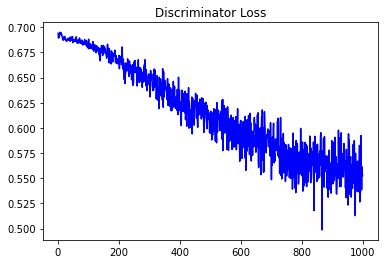

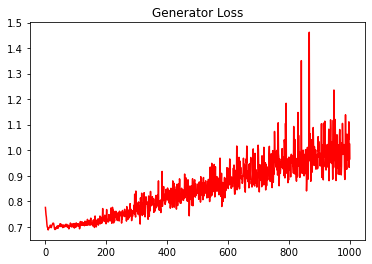

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5043207483738661


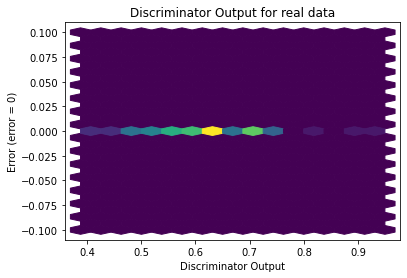

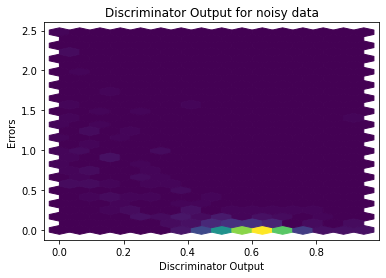

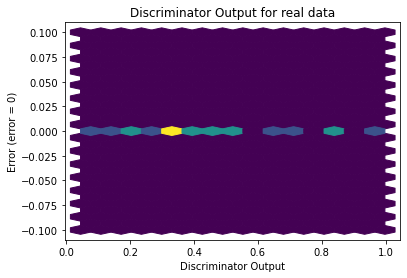

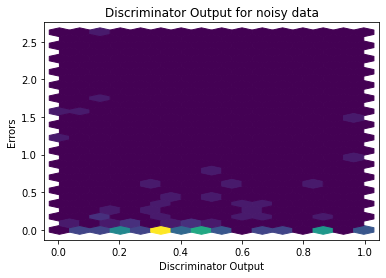

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


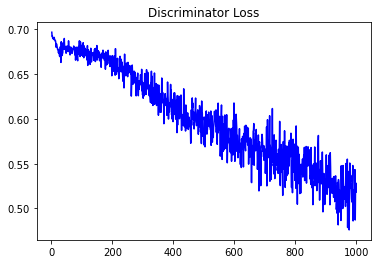

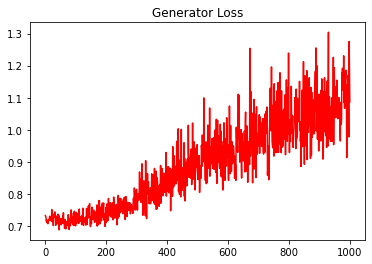

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4406715203896165


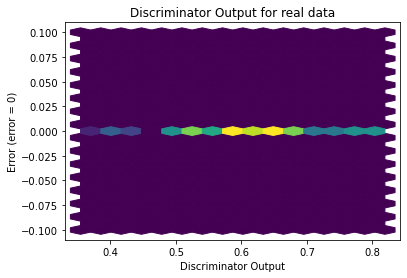

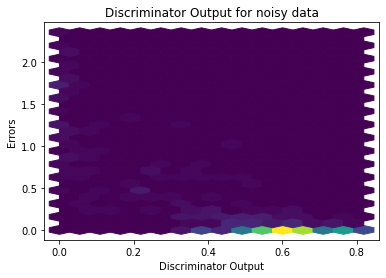

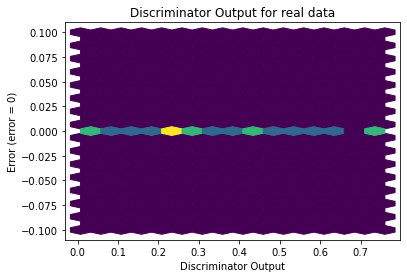

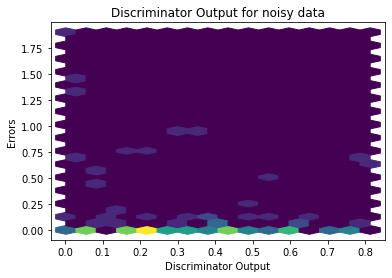

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5762]], requires_grad=True)
